In [ ]:
# random test result file generation

import pandas as pd
import numpy as np
from faker import Faker 

df_org = pd.read_csv('./testresults/testsuite.tsv', sep='\t')

for i in range(5):
    # copy from origin
    df = df_org.copy()
    
    # test result
    df['wer'] = np.clip(np.random.normal(0.5, 0.1, df.shape[0]), 0, 1)
    df['i_bleu'] = 1 - df['wer'] + np.random.normal(0, 0.1, df.shape[0])
    df['i_bleu'] = np.clip(df['i_bleu'], 0, 1)
    df['bleu'] = np.clip(np.random.normal(0.5, 0.1, df.shape[0]), 0, 1)
    
    # force fomatting
    df = pd.concat([df]*3)

    # fake reference text
    fake = Faker()
    df['ref'] = [fake.text() for _ in range(df.shape[0])]
    df = df.sort_values(by='path', ascending=1).reset_index(drop=True)

    # save test result
    df.to_csv(f'./testresults/testresult - {i}.csv')

In [32]:
df['wer'].mean() , df['bleu'].mean(), df['i_bleu'].mean()

(0.4962608313783427, 0.5012529276965072, 0.5023474474259313)

In [39]:
import pandas as pd

df = pd.read_csv('./testresults/testresult - 4.csv')

df = df.drop(columns=['Unnamed: 0','ref']).drop_duplicates()

len(df)


721

In [51]:
# 문체
df.accents.value_counts()
df['sentence_style'] = df['accents'].apply(lambda x: 'written' if x == 'reading book' else 'spoken')
df['sentence_style'].value_counts(dropna=False)

sentence_style
spoken     698
written     23
Name: count, dtype: int64

In [42]:
# 문장길이
# 장문 : 3사분위수 초과
# 중문 : 1사분위수 ~ 3사 분위수
# 단문 : 1사분위수 미만
df['sentence_len'] = df['sentence'].str.len()
q1 = df.sentence_len.quantile(q = 0.25) 
q3 = df.sentence_len.quantile(q = 0.75)
df['sentence_len_type'] = df['sentence_len'].apply(lambda x: 'long' if x > q3 else ('short' if x < q1 else 'middle'))
df.sentence_len_type.value_counts(dropna=False)

sentence_len_type
middle    376
long      177
short     168
Name: count, dtype: int64

In [49]:
df['gender'] = df['gender'].fillna('Unknown')
df['gender'].value_counts(dropna=False)

gender
male       484
female     141
Unknown     96
Name: count, dtype: int64

In [50]:
df['age'].value_counts(dropna=False)
df['age'] = df['age'].replace({'teens':'10s', 'twenties':'20s', 'thirties':'30s', 'fourties':'40s'})
df['age'] = df['age'].fillna('Unknown')
df['age'].value_counts(dropna=False)

age
20s        317
30s        235
Unknown     96
40s         50
10s         23
Name: count, dtype: int64

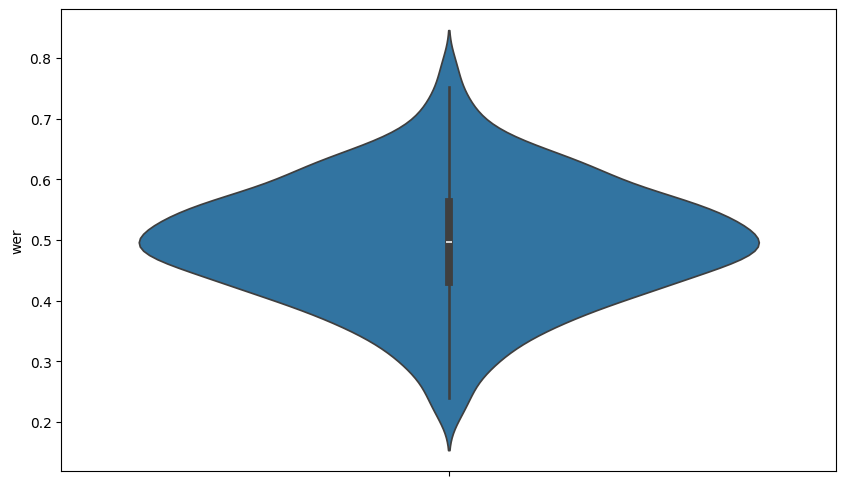

In [119]:
dfa = df.groupby(['sentence_style'])[['wer']].mean().T
dfb = df.groupby(['sentence_len_type'])[['wer']].mean().T
dfc = df.groupby(['gender'])[['wer']].mean().T
dfd = df.groupby(['age'])[['wer']].mean().T

# dfc = pd.concat([dfa, dfb], axis=1)

# dfc
dfe = pd.concat([dfa.reset_index(drop=True), 
                 dfb.reset_index(drop=True),
                 dfc.reset_index(drop=True),
                 dfd.reset_index(drop=True)], axis=1).reset_index(drop=True)

# dfe.index = ['한국어', '영어', '중국어']
# dfe.loc['영어':, :] = np.nan

dfe
# dfc.columns = pd.MultiIndex.from_tuples([('style', col) if i < 2 else ('len', col) for i, col in enumerate(dfc.columns)])
# dfc

# 입력 언어 , 출력 언어를 추가해야 함
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# sns.violinplot(data=df['wer'])

# plt.show()
import streamlit as st
st.scatter_chart(
    df,
    x='wer',
    y=['setence_len'],
    size='col4',
    color=['#FF0000', '#0000FF'],  # Option
)